In [183]:
import cv2
import numpy as np 
import plotly.express as px
import os
from google.colab.patches import cv2_imshow 
import matplotlib.pyplot as plt
%matplotlib inline
import math
import time
import cmath
from scipy import signal
from scipy import misc
from sortedcontainers import SortedList

# Q1: Linear spatial filters

#### 1
Implement an algorithm for low-pass filtering a grayscale image by moving a k × k averaging filter of the form ones $((k,k))/(k^2).$

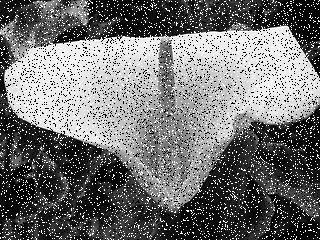

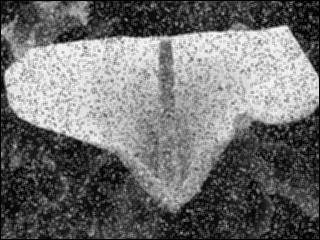

In [ ]:
def makeavgfilter(k):
  filter=np.full((k, k), 1/(k*k))
  return filter
  
def convolution(im, k):
    im = im.astype(np.float64)
    k = k.astype(np.float64)

    r,c=im.shape
    size=k.shape[0]
    res = np.zeros(im.shape)
    size1=int(size/2)
    size2=int((size-1)/2)

    for i in range(size1, r-size2):
        for j in range(size1, c-size2):
            res[i][j] = max(0, sum(sum(k*im[i-size1:i+size2+1, j-size1:j+size2+1])))
    return res.astype(np.uint8)

noisy=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/Noisy.jpg",0)
cv2_imshow(noisy)
avg_filter=makeavgfilter(3)
cv2_imshow(convolution(noisy,avg_filter))

#### 2

As the filter is moved from one spatial location to the next one, the filter window shares many common pixels in adjacent neighborhoods. Exploit this observation and implement a more efficient version of averaging filter

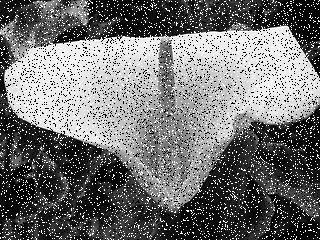

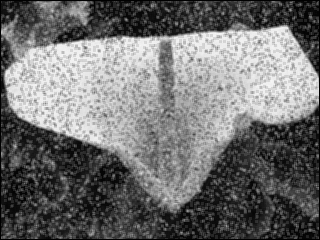

In [ ]:
def lowpass(img,size):
  r,c = img.shape
  res=np.zeros(img.shape)
  cum=np.zeros(img.shape)
  cum1=np.zeros(img.shape)
  pad=size//2
  for i in range(r):
    cum[i,0] = img[i,0]
    for j in range(1, size):
      cum[i,j] = cum[i,j-1]+img[i,j]
    for j in range(size, c):
      cum[i,j] = cum[i,j-1]-img[i,j-size]+img[i,j]
  for i in range(c):
    cum1[0,i] = cum[0,i]
    for j in range(1,size):
      cum1[j,i]=cum1[j-1,i]+cum[j,i]
    for j in range(size, r):
      cum1[j,i] = cum1[j-1,i]-cum[j-size,i]+cum[j,i]
  for i in range(int(size/2), r-int(size/2)):
    for j in range(int(size/2), c-int(size/2)):
      res[i,j] = cum1[i+int(size/2),j+int(size/2)]/(size**2)
  return res

noisy=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/Noisy.jpg",0)
cv2_imshow(noisy)
cv2_imshow(lowpass(noisy,3))

####3
To appreciate the benefits of doing so, generate a plot of k vs run-time for various
sized images. The plot diagram should contain a line plot for each image size
you pick. Use different marker types to distinguish the default implementation
and improved implementation. Just to give you a rough idea, look at https:
//imgur.com/a/0HtYlTE.

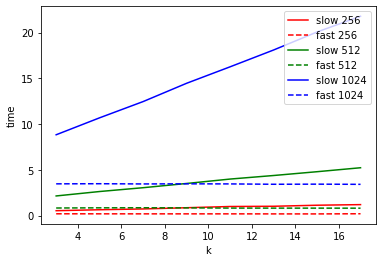

In [ ]:
def makeavgfilter(k):
  filter=np.full((k, k), 1/(k*k))
  return filter

def convolution(im, k):
    im = im.astype(np.float64)
    k = k.astype(np.float64)

    r,c=im.shape
    size=k.shape[0]
    res = np.zeros(im.shape)
    size1=int(size/2)
    size2=int((size-1)/2)

    for i in range(size1, r-size2):
        for j in range(size1, c-size2):
            res[i][j] = max(0, sum(sum(k*im[i-size1:i+size2+1, j-size1:j+size2+1])))
    return res.astype(np.uint8)

lena_256=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/8-bit-256-x-256-Grayscale-Lena-Image_Q320.jpg",0)
lena_512=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/lena15.jpg",0)
lena_1024=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/image (5).jpg",0)

ks=[k for k in range(3,19,2)]
times_slow1=[]
times_fast1=[]
times_slow2=[]
times_fast2=[]
times_slow3=[]
times_fast3=[]

for k in range(3,19,2):
  start = time.time()
  avg_filter=makeavgfilter(k)
  blurred_image=convolution(lena_256,avg_filter)
  end = time.time()
  times_slow1.append(end-start)

  start = time.time()
  blurred_mage = lowpass(lena_256,k)    
  end = time.time()
  times_fast1.append(end-start)

  start = time.time()
  avg_filter=makeavgfilter(k)
  blurred_image=convolution(lena_512,avg_filter)
  end = time.time()
  times_slow2.append(end-start)

  start = time.time()
  blurred_mage = lowpass(lena_512,k)    
  end = time.time()
  times_fast2.append(end-start)

  start = time.time()
  avg_filter=makeavgfilter(k)
  blurred_image=convolution(lena_1024,avg_filter)
  end = time.time()
  times_slow3.append(end-start)

  start = time.time()
  blurred_mage = lowpass(lena_1024,k)    
  end = time.time()
  times_fast3.append(end-start)

plt.xlabel('k')
plt.ylabel('time')

plt.plot(ks,times_slow1,'r-')
plt.plot(ks,times_fast1,'r--')
plt.plot(ks,times_slow2,'g-')
plt.plot(ks,times_fast2,'g--')
plt.plot(ks,times_slow3,'b-')
plt.plot(ks,times_fast3,'b--')
plt.legend(['slow 256','fast 256','slow 512','fast 512','slow 1024','fast 1024'], loc='upper right')

plt.show()

####4
Utilize the observation similar to above to implement an efficient version of a k × k
median filter. Generate a plot figure similar to previous question.

Original noisy image:


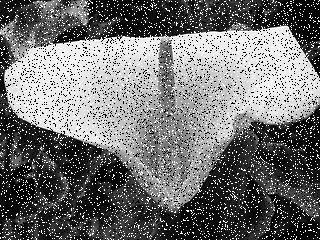

Slow median filtering:


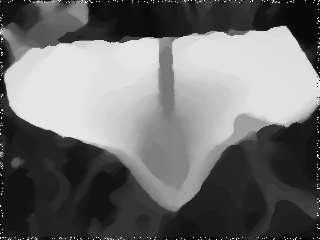

Fast median filtering:


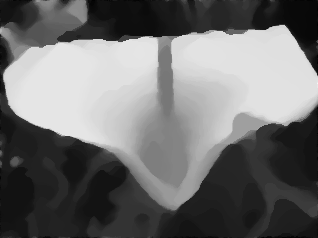

[]

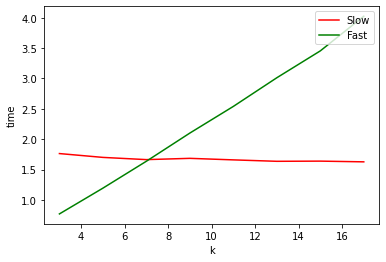

In [184]:
def medianfilter(img,k):
    h,l=img.shape
    for i in range(k,h-k):
        for j in range(k,l-k):
            mask=img[i-k:i+k+1,j-k:j+k+1]
            med=np.median(mask)
            img[i,j]=int(med)
    return img

def medianfiltergood(img, k):
  out=np.zeros((img.shape[0]-k+1, img.shape[1]-k+1))
  x=int((k-1)/2)
  for i in range(x, img.shape[0]-x):
      setOfNum=SortedList()
      for m in range(-1*x, x+1):
          for n in range(-1*x, x+1):
              setOfNum.add(img[i+m, x+n])
      out[i-x, 0]=setOfNum[(k**2)//2]
      for j in range(x+1, img.shape[1]-x):
          for m in range(-1*x, x+1):
              setOfNum.remove(img[i+m, j-1-x])
          for m in range(-1*x, x+1):
              setOfNum.add(img[i+m, j+x])
          out[i-x, j-x]=setOfNum[(k**2)//2]
  return out

noisy=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/Noisy.jpg",0)
print("Original noisy image:")
cv2_imshow(noisy)
print("Slow median filtering:")
cv2_imshow(medianfilter(noisy,3))
print("Fast median filtering:")
cv2_imshow(medianfiltergood(noisy,3))

ks=[k for k in range(3,19,2)]
slow=[]
fast=[]

for k in range(3,19,2):
  start = time.time()
  medianfilter(noisy,k)
  end = time.time()
  slow.append(end-start)

  start = time.time()
  medianfiltergood(noisy,k)
  end = time.time()
  fast.append(end-start)

plt.xlabel('k')
plt.ylabel('time')
plt.plot(ks,slow,'r-')
plt.plot(ks,fast,'g-')
plt.legend(['Slow','Fast'], loc='upper right')
plt.plot()


#Q2:  Edge Detection


#### 1
Read about Canny Edge detector. Apply the Canny edge detector (use inbuilt
cv2.Canny function for this task) to bell.jpg.

144.65246143100097


Text(0.5, 1.0, 'Canny Filtered image')

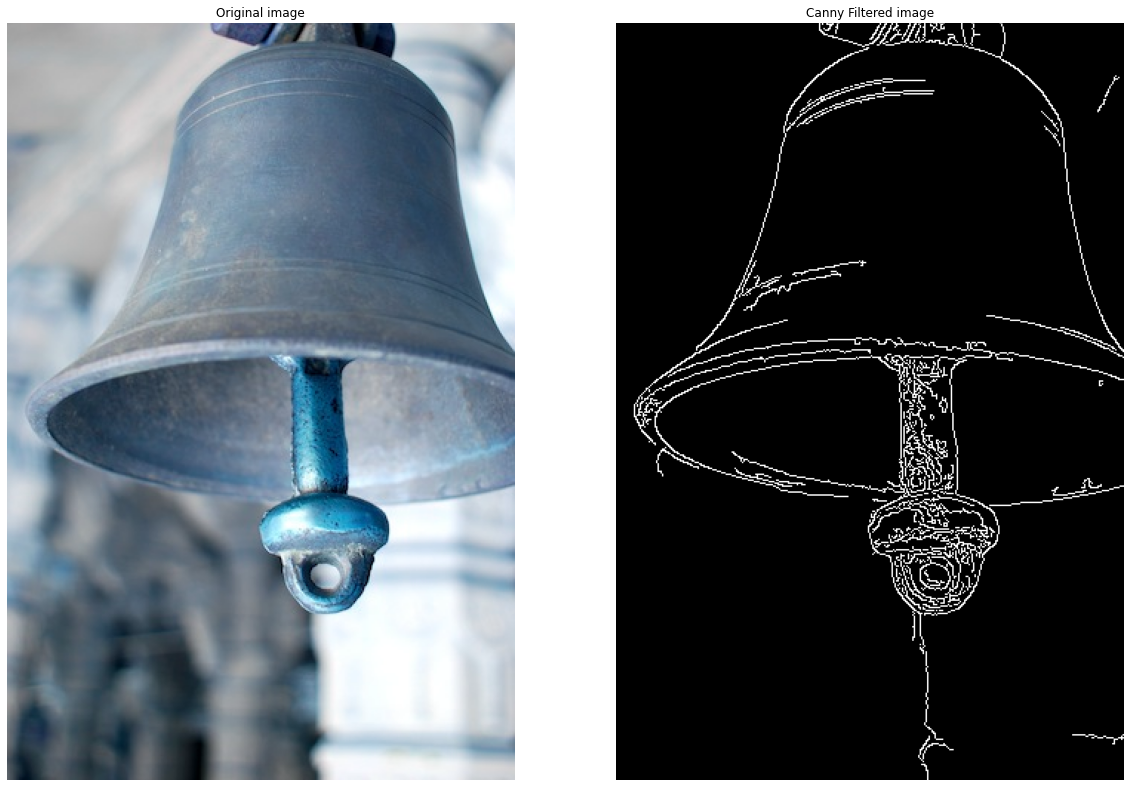

In [ ]:
bell=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/bell.jpg")
print(np.mean(bell))
bell_canny=cv2.Canny(bell,50,180)

fig, sub=plt.subplots(1,2,figsize=(20,20))
sub[0].imshow(bell,'gray', vmin=0, vmax=255)
sub[0].axis('off')
sub[0].set_title("Original image")

sub[1].imshow(bell_canny,'gray', vmin=0, vmax=255)
sub[1].axis('off')
sub[1].set_title("Canny Filtered image")

#### 2
Tweak the values of the arguments (minVal and maxVal), and report the values
that give the best results for each image. (Hint: Try to detect as many edges in
the bell as possible, while avoiding edges in the background.).

147.67958500364432


Text(0.5, 1.0, 'Canny_4')

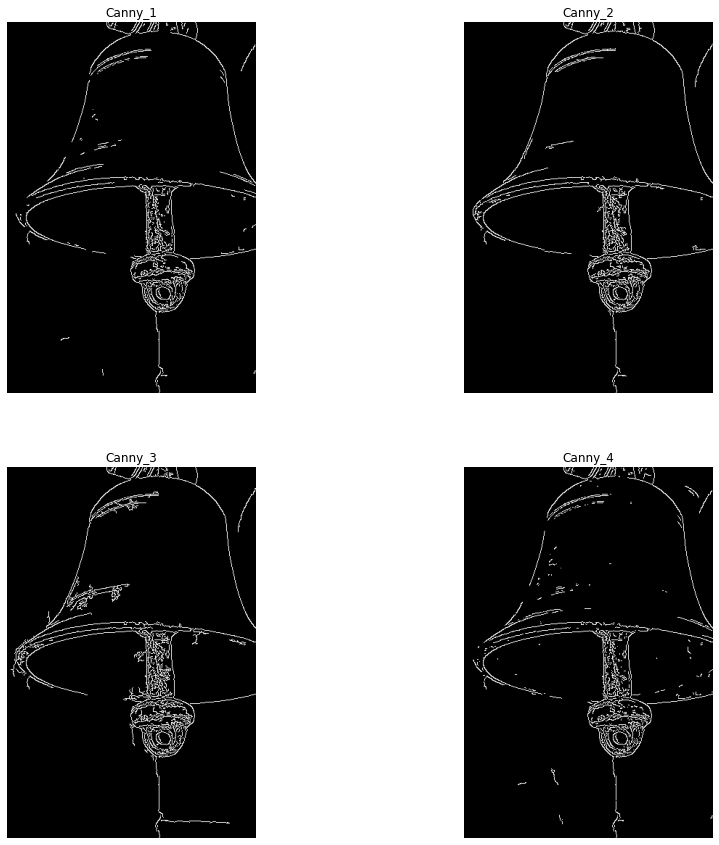

In [ ]:
bell=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/bell.jpg",0)
print(np.mean(bell))
bell_canny_1=cv2.Canny(bell,95,141) #Taking min and max as .66*mean, 1.33*mean
bell_canny_2=cv2.Canny(bell,50,180) #Pushing values further apart
bell_canny_3=cv2.Canny(bell,25,200)
bell_canny_4=cv2.Canny(bell,100,120)

fig, sub=plt.subplots(2,2,figsize=(15,15))
sub[0][0].imshow(bell_canny_1,'gray', vmin=0, vmax=255)
sub[0][0].axis('off')
sub[0][0].set_title("Canny_1")

sub[0][1].imshow(bell_canny_2,'gray', vmin=0, vmax=255)
sub[0][1].axis('off')
sub[0][1].set_title("Canny_2")

sub[1][0].imshow(bell_canny_3,'gray', vmin=0, vmax=255)
sub[1][0].axis('off')
sub[1][0].set_title("Canny_3")

sub[1][1].imshow(bell_canny_4,'gray', vmin=0, vmax=255)
sub[1][1].axis('off')
sub[1][1].set_title("Canny_4")

#### 3
Consider Roberts, Prewitt, Sobel and Laplacian filters discussed in the class.
Implement and apply these filters on kobe.png and make observations upon comparing their outputs. Compare these with the output of Canny edge detector on
the same image.

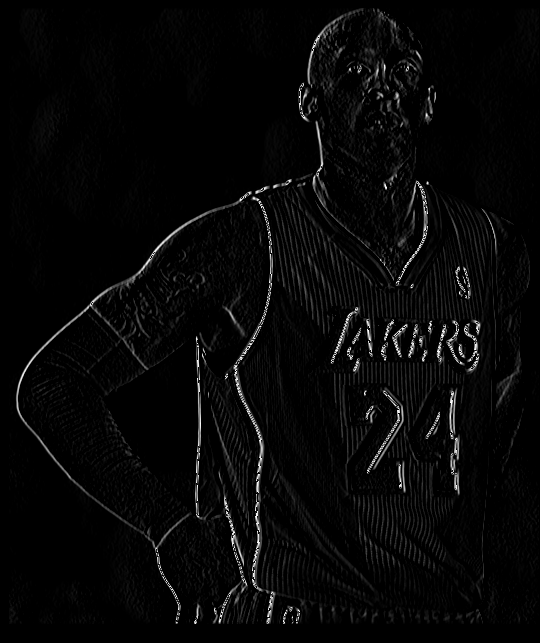

Text(0.5, 1.0, 'Laplacian 2')

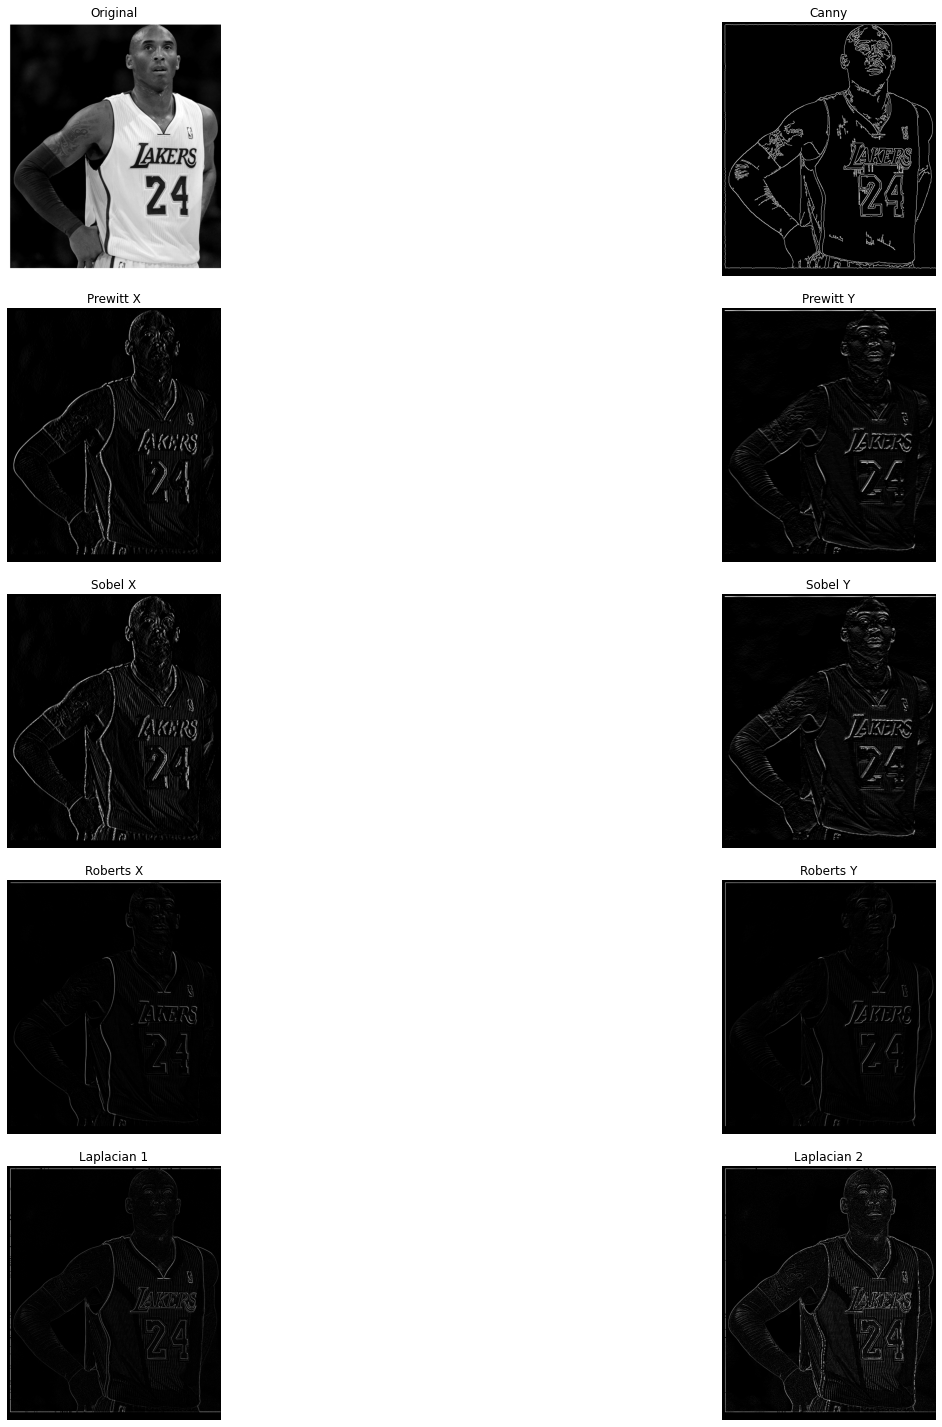

In [ ]:
def convolution(im, k):
    im = im.astype(np.float64)
    k=np.asarray(k)
    k = k.astype(np.float64)

    r,c=im.shape
    size=k.shape[0]
    res = np.zeros(im.shape)
    size1=int(size/2)
    size2=int((size-1)/2)

    for i in range(size1, r-size2):
        for j in range(size1, c-size2):
            res[i][j] = max(0, sum(sum(k*im[i-size1:i+size2+1, j-size1:j+size2+1])))
    return res.astype(np.uint8)


kobe=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/kobe.png",0)

prewitt_x=[[-1,0,1],
         [-1,0,1],
         [-1,0,1]]
prewitt_y=[[1,1,1],
         [0,0,0],
         [-1,-1,-1]]

sobel_x=[[-1,0,1],
         [-2,0,2],
         [-1,0,1]]
sobel_y=[[1,2,1],
         [0,0,0],
         [-1,-2,-1]]

roberts_x=[[0,1],
           [-1,0]]
roberts_y=[[1,0],
           [0,-1]]

laplacian_1=[[0,1,0],
             [1,-4,1],
             [0,1,0]]
laplacian_2=[[1,1,1],
             [1,-8,1],
             [1,1,1]]


cv2_imshow(convolution(kobe,prewitt_x))
#the 5x2 subplot is reducing image quality, you can see the clear prewitt filtered image here


fig, sub=plt.subplots(5,2,figsize=(20,20))
fig.tight_layout()
sub[0][0].imshow(kobe,'gray', vmin=0, vmax=255)
sub[0][0].axis('off')
sub[0][0].set_title("Original")

sub[0][1].imshow(cv2.Canny(kobe,50,180),'gray', vmin=0, vmax=255)
sub[0][1].axis('off')
sub[0][1].set_title("Canny")

sub[1][0].imshow(convolution(kobe,prewitt_x),'gray', vmin=0, vmax=255)
sub[1][0].axis('off')
sub[1][0].set_title("Prewitt X")

sub[1][1].imshow(convolution(kobe,prewitt_y),'gray', vmin=0, vmax=255)
sub[1][1].axis('off')
sub[1][1].set_title("Prewitt Y")

sub[2][0].imshow(convolution(kobe,sobel_x),'gray', vmin=0, vmax=255)
sub[2][0].axis('off')
sub[2][0].set_title("Sobel X")

sub[2][1].imshow(convolution(kobe,sobel_y),'gray', vmin=0, vmax=255)
sub[2][1].axis('off')
sub[2][1].set_title("Sobel Y")

sub[3][0].imshow(convolution(kobe,roberts_x),'gray', vmin=0, vmax=255)
sub[3][0].axis('off')
sub[3][0].set_title("Roberts X")

sub[3][1].imshow(convolution(kobe,roberts_y),'gray', vmin=0, vmax=255)
sub[3][1].axis('off')
sub[3][1].set_title("Roberts Y")

sub[4][0].imshow(convolution(kobe,laplacian_1),'gray', vmin=0, vmax=255)
sub[4][0].axis('off')
sub[4][0].set_title("Laplacian 1")

sub[4][1].imshow(convolution(kobe,laplacian_2),'gray', vmin=0, vmax=255)
sub[4][1].axis('off')
sub[4][1].set_title("Laplacian 2")

####4
What will the 5×5 variants of Sobel and Prewitt filters look like? Apply these larger filters on kobe.png and make observations upon comparing their outputs with the corresponding smaller filters.

Text(0.5, 1.0, 'Sobel,Y,5x5')

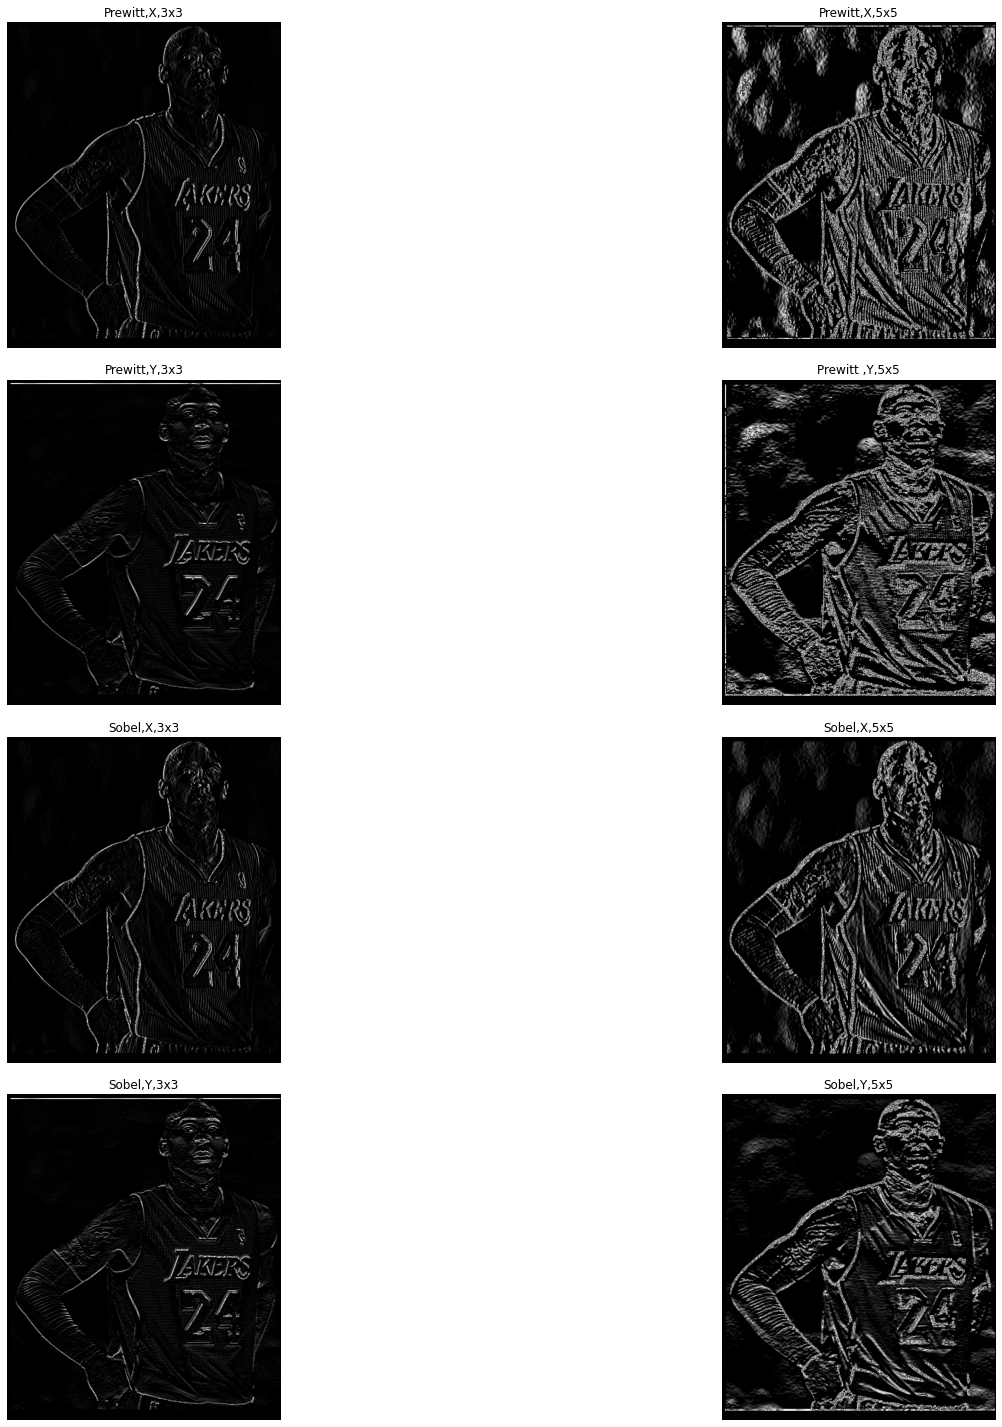

In [ ]:
def convolution(im, k):
    im = im.astype(np.float64)
    k=np.asarray(k)
    k = k.astype(np.float64)

    r,c=im.shape
    size=k.shape[0]
    res = np.zeros(im.shape)
    size1=int(size/2)
    size2=int((size-1)/2)

    for i in range(size1, r-size2):
        for j in range(size1, c-size2):
            res[i][j] = max(0, sum(sum(k*im[i-size1:i+size2+1, j-size1:j+size2+1])))
    return res.astype(np.uint8)

kobe=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/kobe.png",0)

prewitt_x=[[-1,0,1],
         [-1,0,1],
         [-1,0,1]]
prewitt_y=[[1,1,1],
         [0,0,0],
         [-1,-1,-1]]

sobel_x=[[-1,0,1],
         [-2,0,2],
         [-1,0,1]]
sobel_y=[[1,2,1],
         [0,0,0],
         [-1,-2,-1]]

sobel_x5=[[-2,-1,0,1,2],
          [-2,-1,0,1,2],
          [-4,-2,0,2,4],
          [-2,-1,0,1,2],
          [-2,-1,0,1,2]]
sobel_y5=[[-2,-2,-4,-2,-2],
          [-1,-1,-2,-1,-1],
          [0,0,0,0,0],
          [1,1,2,1,1],
          [2,2,4,2,2]]

prewitt_x5=[[-7,-7,-7,9,9],
            [-7,-3,-3,5,9],
            [-7,-3,0,5,9],
            [-7,-3,-3,5,9],
            [-7,-7,-7,9,9]]
prewitt_y5=[[-7,-7,-7,-7,-7],
            [-7,-3,-3,-3,-7],
            [-7,-3,0,-3,-7],
            [9,5,5,5,9],
            [9,9,9,9,9]]


fig, sub=plt.subplots(4,2,figsize=(20,20))
fig.tight_layout()
sub[0][0].imshow(convolution(kobe,prewitt_x),'gray', vmin=0, vmax=255)
sub[0][0].axis('off')
sub[0][0].set_title("Prewitt,X,3x3")

sub[0][1].imshow(convolution(kobe,prewitt_x5),'gray', vmin=0, vmax=255)
sub[0][1].axis('off')
sub[0][1].set_title("Prewitt,X,5x5")

sub[1][0].imshow(convolution(kobe,prewitt_y),'gray', vmin=0, vmax=255)
sub[1][0].axis('off')
sub[1][0].set_title("Prewitt,Y,3x3")

sub[1][1].imshow(convolution(kobe,prewitt_y5),'gray', vmin=0, vmax=255)
sub[1][1].axis('off')
sub[1][1].set_title("Prewitt ,Y,5x5")

sub[2][0].imshow(convolution(kobe,sobel_x),'gray', vmin=0, vmax=255)
sub[2][0].axis('off')
sub[2][0].set_title("Sobel,X,3x3")

sub[2][1].imshow(convolution(kobe,sobel_x5),'gray', vmin=0, vmax=255)
sub[2][1].axis('off')
sub[2][1].set_title("Sobel,X,5x5")

sub[3][0].imshow(convolution(kobe,sobel_y),'gray', vmin=0, vmax=255)
sub[3][0].axis('off')
sub[3][0].set_title("Sobel,Y,3x3")

sub[3][1].imshow(convolution(kobe,sobel_y5),'gray', vmin=0, vmax=255)
sub[3][1].axis('off')
sub[3][1].set_title("Sobel,Y,5x5")



####5
Add noise to the input image above using Gaussian sampling. Study the effect of
applying the above filters(from 2nd part) on noise-affected inputs.

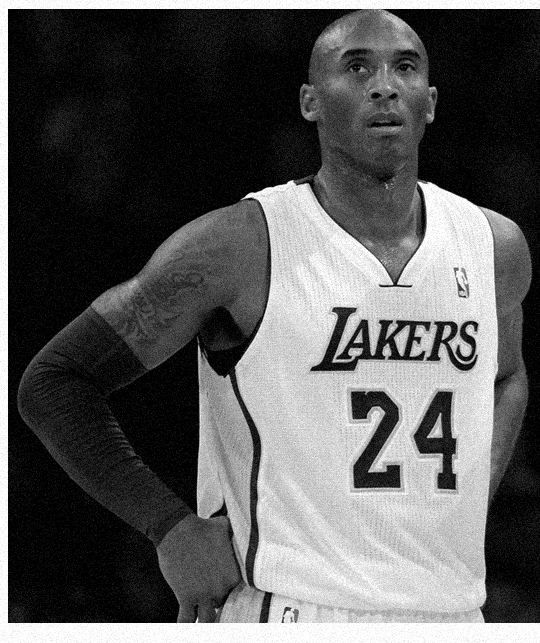

Text(0.5, 1.0, 'Laplacian 2')

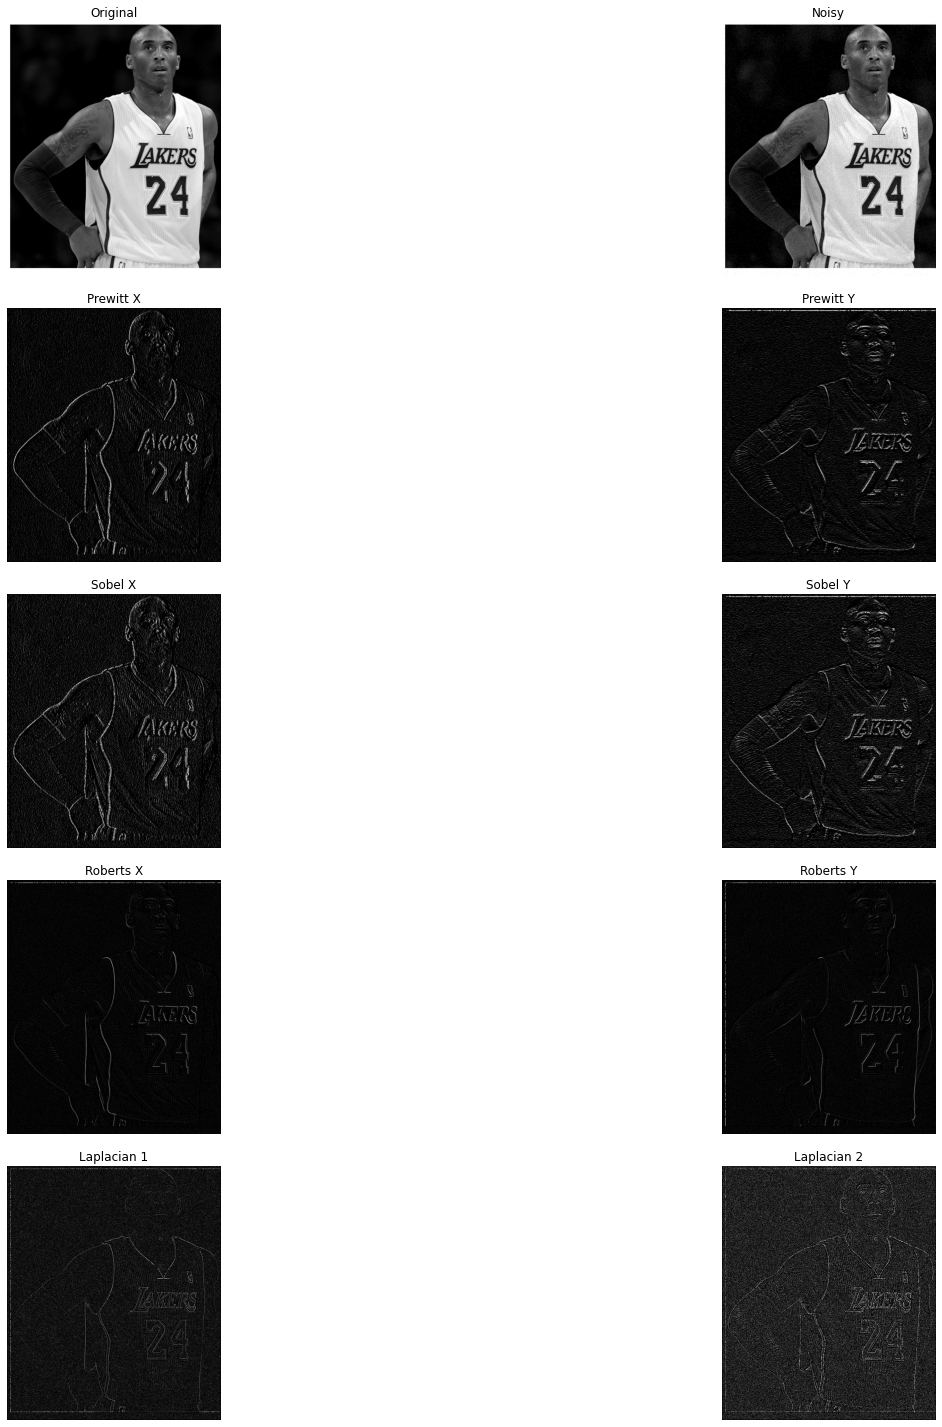

In [ ]:
def noisy(image):
    row,col=image.shape
    mean=0
    sigma=10
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy = image + gauss
    return noisy

def convolution(im, k):
    im = im.astype(np.float64)
    k=np.asarray(k)
    k = k.astype(np.float64)

    r,c=im.shape
    size=k.shape[0]
    res = np.zeros(im.shape)
    size1=int(size/2)
    size2=int((size-1)/2)

    for i in range(size1, r-size2):
        for j in range(size1, c-size2):
            res[i][j] = max(0, sum(sum(k*im[i-size1:i+size2+1, j-size1:j+size2+1])))
    return res.astype(np.uint8)

kobe=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/kobe.png",0)
kobeorig=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/kobe.png",0)
#kobe=noisy(kobe)
noise=np.random.normal(0.0, 10, kobe.shape)
kobe=kobe.astype(np.float64)+noise
#kobe = kobe.astype(np.uint8)
cv2_imshow(kobe)

prewitt_x=[[-1,0,1],
         [-1,0,1],
         [-1,0,1]]
prewitt_y=[[1,1,1],
         [0,0,0],
         [-1,-1,-1]]

sobel_x=[[-1,0,1],
         [-2,0,2],
         [-1,0,1]]
sobel_y=[[1,2,1],
         [0,0,0],
         [-1,-2,-1]]

roberts_x=[[0,1],
           [-1,0]]
roberts_y=[[1,0],
           [0,-1]]

laplacian_1=[[0,1,0],
             [1,-4,1],
             [0,1,0]]
laplacian_2=[[1,1,1],
             [1,-8,1],
             [1,1,1]]

fig, sub=plt.subplots(5,2,figsize=(20,20))
fig.tight_layout()
sub[0][0].imshow(kobeorig,'gray', vmin=0, vmax=255)
sub[0][0].axis('off')
sub[0][0].set_title("Original")

sub[0][1].imshow(kobe,'gray', vmin=0, vmax=255)
sub[0][1].axis('off')
sub[0][1].set_title("Noisy")

sub[1][0].imshow(convolution(kobe,prewitt_x),'gray', vmin=0, vmax=255)
sub[1][0].axis('off')
sub[1][0].set_title("Prewitt X")

sub[1][1].imshow(convolution(kobe,prewitt_y),'gray', vmin=0, vmax=255)
sub[1][1].axis('off')
sub[1][1].set_title("Prewitt Y")

sub[2][0].imshow(convolution(kobe,sobel_x),'gray', vmin=0, vmax=255)
sub[2][0].axis('off')
sub[2][0].set_title("Sobel X")

sub[2][1].imshow(convolution(kobe,sobel_y),'gray', vmin=0, vmax=255)
sub[2][1].axis('off')
sub[2][1].set_title("Sobel Y")

sub[3][0].imshow(convolution(kobe,roberts_x),'gray', vmin=0, vmax=255)
sub[3][0].axis('off')
sub[3][0].set_title("Roberts X")

sub[3][1].imshow(convolution(kobe,roberts_y),'gray', vmin=0, vmax=255)
sub[3][1].axis('off')
sub[3][1].set_title("Roberts Y")

sub[4][0].imshow(convolution(kobe,laplacian_1),'gray', vmin=0, vmax=255)
sub[4][0].axis('off')
sub[4][0].set_title("Laplacian 1")

sub[4][1].imshow(convolution(kobe,laplacian_2),'gray', vmin=0, vmax=255)
sub[4][1].axis('off')
sub[4][1].set_title("Laplacian 2")


#Q3: Bilateral Filtering



####1
Implement Bilateral Filtering and apply it on mountain.jpg

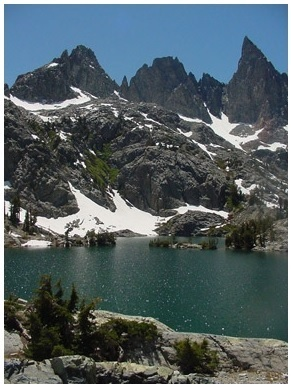

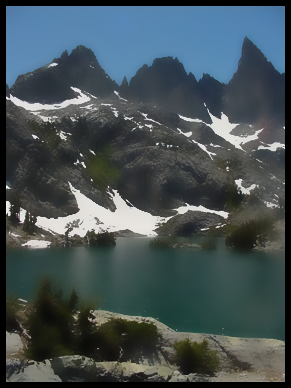

In [ ]:
mountain=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/mountain.jpg")
cv2_imshow(mountain)

def bilateralFilter(img,sigs,sigd,size):
  img = img.astype(np.float64)
  row,col,_ = img.shape
  res = np.zeros(img.shape)
  pad=size//2

  gauss=np.zeros((size,size))
  for i in range(-pad, pad+1):
    for j in range(-pad, pad+1):
      dist=np.sqrt((i)**2+(j)**2)
      gauss[i,j]=math.exp(-(dist**2)/(2*sigs**2))
    
  for i in range(pad, row-pad):
      for j in range(pad, col-pad):
          for channel in range(3):
            temp=img[i-pad : i+pad+1,   j-pad : j+pad+1,   channel : channel+1]
            temp=temp.reshape(size,size)
            dist=temp-img[i][j][channel]
            dist=np.exp( - (dist**2) /(2*sigd**2) )
            kernel=dist*gauss
            norm=sum(sum(kernel))
            kernel=kernel/norm
            res[i][j][channel]=sum(sum(temp*kernel))
  return res.astype(np.uint8)
mountain=bilateralFilter(mountain,1000,40,13)
cv2_imshow(mountain)

####2

In low light imaging, images tend to be noisy and lose sharp edges. However, with
flash, there is an unpleasant direct-lighting effect. Here, a cross bilateral filter
can be used with the range and spatial filters acting on two different images.

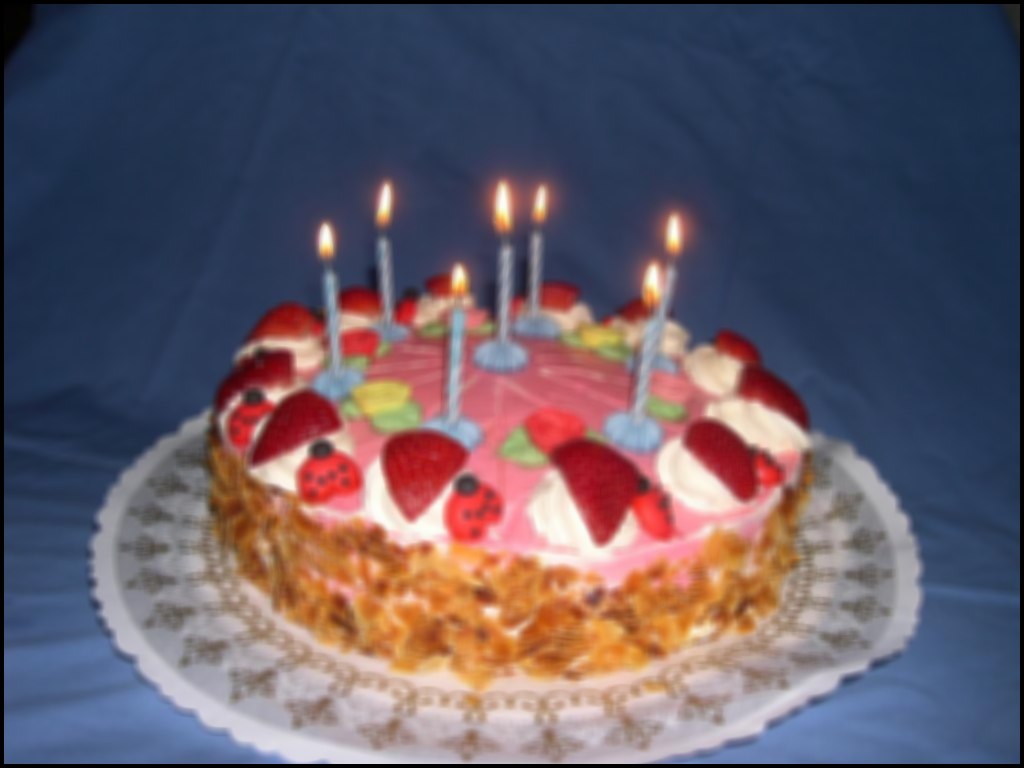

In [ ]:
caken=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/cake_noflash.jpg")
cake=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/cake_flash.jpg")

def bilateralFilter(img1,img2,sigs,sigd,size):
  img1 = img1.astype(np.float64)
  img2 = img2.astype(np.float64)
  row,col,_ = img1.shape
  res = np.zeros(img1.shape)
  pad=size//2
  #calculate the gaussian kernel

  gauss=np.zeros((size,size))
  for i in range(-pad, pad+1):
    for j in range(-pad, pad+1):
      dist=np.sqrt((i)**2+(j)**2)
      gauss[i,j]=math.exp(-(dist**2)/(2*sigs**2))

  for i in range(pad, row-pad):
      for j in range(pad, col-pad):
          for channel in range(3):
            temp=img1[i-pad : i+pad+1,   j-pad : j+pad+1,   channel : channel+1]
            temp=temp.reshape(size,size)
            dist=temp-img2[i][j][channel]
            dist=np.exp( - (dist**2) /(2*sigd**2) )
            kernel=dist*gauss
            norm=sum(sum(kernel))
            kernel=kernel/norm
            res[i][j][channel]=sum(sum(temp*kernel))
  return res.astype(np.uint8)
out=bilateralFilter(cake,caken,200,200,9)
cv2_imshow(out)


#Q4 Cartoonify


####1

In [ ]:
car=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/20ef577e99202b4b0ed0de7cfd998221.png")

def bilateralFilter(img,sigs,sigd,size):
  img = img.astype(np.float64)
  row,col,_ = img.shape
  res = np.zeros(img.shape)
  pad=size//2

  gauss=np.zeros((size,size))
  for i in range(-pad, pad+1):
    for j in range(-pad, pad+1):
      dist=np.sqrt((i)**2+(j)**2)
      gauss[i,j]=math.exp(-(dist**2)/(2*sigs**2))

  for i in range(pad, row-pad):
      for j in range(pad, col-pad):
          for channel in range(3):
            temp=img[i-pad : i+pad+1,   j-pad : j+pad+1,   channel : channel+1]
            temp=temp.reshape(size,size)
            dist=temp-img[i][j][channel]
            dist=np.exp( - (dist**2) /(2*sigd**2) )
            kernel=dist*gauss
            norm=sum(sum(kernel))
            kernel=kernel/norm
            res[i][j][channel]=sum(sum(temp*kernel))
  return res.astype(np.uint8)

car_bil=bilateralFilter(car,200,40,11)

In [ ]:
def gaussianBlur(img,sig,size):
  img = img.astype(np.float64)
  row,col = img.shape
  res = np.zeros(img.shape)
  pad=size//2

  gauss=np.zeros((size,size))
  for i in range(-pad, pad+1):
    for j in range(-pad, pad+1):
      dist=np.sqrt((i)**2+(j)**2)
      gauss[i,j]=math.exp(-(dist**2)/(2*sig**2))

  for i in range(pad, row-pad):
      for j in range(pad, col-pad):
            temp=img[i-pad : i+pad+1,   j-pad : j+pad+1]
            temp=temp.reshape(size,size)
            norm=sum(sum(gauss))
            gauss=gauss/norm
            res[i][j]=sum(sum(temp*gauss))
  return res.astype(np.uint8)

car_gray=cv2.cvtColor(car,cv2.COLOR_RGB2GRAY)
car_blur=gaussianBlur(car_gray,3,3)

In [ ]:
def adaptiveThresholding(img):
    r, c=img.shape
    S=c/50
    s=int(S/2)
    T=3.0
    temp=np.zeros_like(img, dtype=np.uint64)

    for col in range(c):
        for row in range(r):
            temp[row,col] = img[0:row,0:col].sum()
    out_img = np.zeros_like(img)    

    for col in range(c):
        for row in range(r):
            y0 = int(max(row-s, 0))
            y1 = int(min(row+s, r-1))
            x0 = int(max(col-s, 0))
            x1 = int(min(col+s, c-1))
            res=(y1-y0)*(x1-x0)
            sum_=temp[y1, x1]-temp[y0, x1]-temp[y1, x0]+temp[y0, x0]

            if img[row, col]*res < sum_*(100.-T)/100.:
                out_img[row,col] = 0
            else:
                out_img[row,col] = 255
    return out_img.astype('uint8')

car_adapt=adaptiveThresholding(car_blur)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

overflow encountered in ulong_scalars



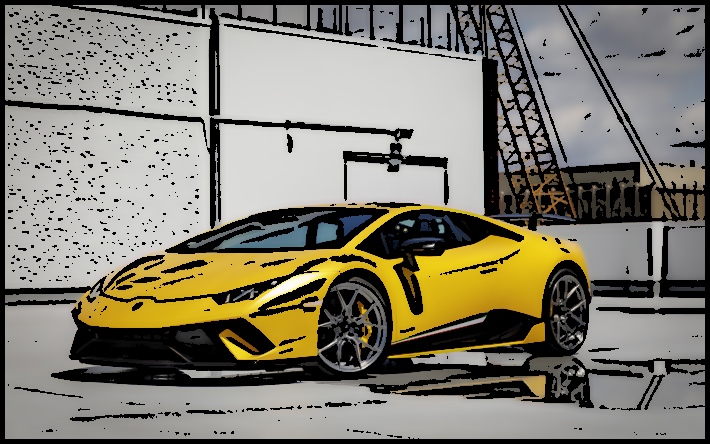

In [ ]:
channel1 =car_bil[:,:,0].reshape(car_bil.shape[0],car_bil.shape[1])
channel2 =car_bil[:,:,1].reshape(car_bil.shape[0],car_bil.shape[1])
channel3 =car_bil[:,:,2].reshape(car_bil.shape[0],car_bil.shape[1])

final=np.zeros(car.shape)
final1 = np.bitwise_and(car_adapt,channel1)
final2 = np.bitwise_and(car_adapt,channel2)
final3 = np.bitwise_and(car_adapt,channel3)
final= np.dstack([final1,final2,final3])
cv2_imshow(final)

#Q5 Fourier Transform


####1
Implement 2D DFT

(256, 256)
built in 2d fft output (real part):


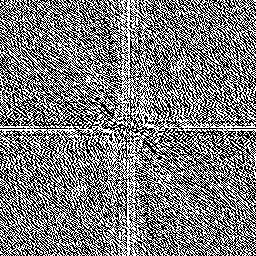

built in 2d fft output (imag part):


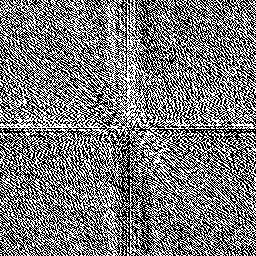

My 2d DFT output (real):


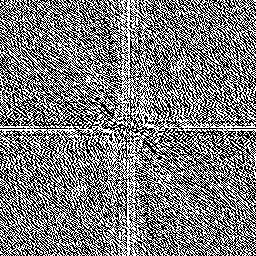

My 2d DFT output (imag):


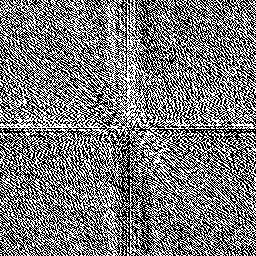

In [ ]:
def dft(x):
    N=x.shape
    y=np.arange(0,x.shape[0],1)
    y=np.outer(y,y)
    factor_exp = np.exp( (-1j*2*np.pi*y) / N)
    final = factor_exp@x
    return final

def dft2d(img):
    row,col = img.shape
    output=np.zeros_like(img, dtype=complex)
    for i in range(row):
        output[i,:]=dft(img[i,:])
    for j in range(col):
        output[:, j]=dft(output[:, j])
    return output

bell=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/8-bit-256-x-256-Grayscale-Lena-Image_Q320.jpg",0)
print(bell.shape)
#d=np.log(1+np.abs(np.fft.fftshift(dft2d(bell))))
#a=np.log(1+np.abs(np.fft.fftshift(np.fft.fft2(bell))))

d=(np.fft.fftshift(dft2d(bell)))
a=np.fft.fftshift(np.fft.fft2(bell))
print("built in 2d fft output (real part):")
cv2_imshow(np.real(a))
print("built in 2d fft output (imag part):")
cv2_imshow(np.imag(a))
print("My 2d DFT output (real):")
cv2_imshow(np.real(d))
print("My 2d DFT output (imag):")
cv2_imshow(np.imag(d))

####2
Implement 1D Fast Fourier Transform (Recursive Formulation). Use it to implement 2D FFT and display the result on suitable images of your choice. Compare
the run times of your version of DFT and FFT on different sized inputs and plot
them.

(256, 256)


Text(0.5, 1.0, 'Numpy FFT')

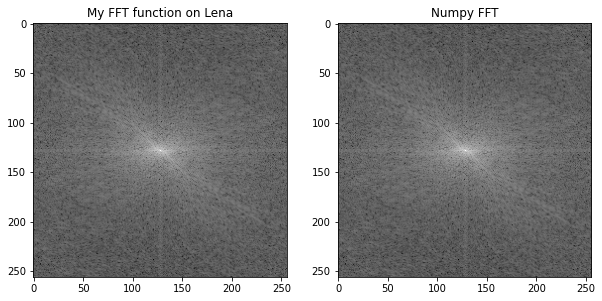

In [ ]:
def fft(x):
    if len(x)<=1: 
      return x

    evens=x[0::2]
    odds=x[1::2]
    even=fft(evens)
    odd=fft(odds)

    T=[np.exp(-2j*np.pi*i/len(x))*odd[i] for i in range(len(odd))]

    out=[]
    out1=even+T
    out=np.append(out,out1)
    out2=even-T
    out=np.append(out,out2)
    return out

def fft2d(img):
    temp=np.apply_along_axis(fft,1,img)
    out=np.apply_along_axis(fft,0,temp)
    return out

flowers=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/8-bit-256-x-256-Grayscale-Lena-Image_Q320.jpg",0)
print(flowers.shape)
fftflowers=(np.log(1 + np.abs(np.fft.fftshift( fft2d(flowers) )) ))
control=(np.log(1 + np.abs(np.fft.fftshift( np.fft.fft2(flowers) )) ))


fig, sub=plt.subplots(1,2,figsize=(10,10))
sub[0].imshow(fftflowers,cmap='gray')
sub[0].set_title("My FFT function on Lena")

sub[1].imshow(control,cmap='gray')
sub[1].set_title("Numpy FFT")

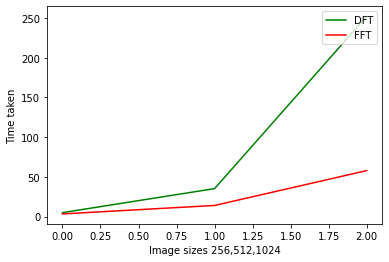

In [ ]:
lena_256=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/8-bit-256-x-256-Grayscale-Lena-Image_Q320.jpg",0)
lena_512=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/lena15.jpg",0)
lena_1024=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/image (5).jpg",0)

ks=[k for k in range(3)]

times_dft=[]
times_fft=[]

start = time.time()
dft2d(lena_256)
end = time.time()
times_dft.append(end-start)

start = time.time()
fft2d(lena_256)
end = time.time()
times_fft.append(end-start)

start = time.time()
dft2d(lena_512)
end = time.time()
times_dft.append(end-start)

start = time.time()
fft2d(lena_512)
end = time.time()
times_fft.append(end-start)

start = time.time()
dft2d(lena_1024)
end = time.time()
times_dft.append(end-start)

start = time.time()
fft2d(lena_1024)
end = time.time()
times_fft.append(end-start)

plt.xlabel('Image sizes 256,512,1024')
plt.ylabel('Time taken')

plt.plot(ks,times_dft,'g-')
plt.plot(ks,times_fft,'r-')
plt.legend(['DFT','FFT'], loc='upper right')

plt.show()

####3
Now, implement 2D Inverse FFT in a similar fashion

Text(0.5, 1.0, 'FFT and IFFT')

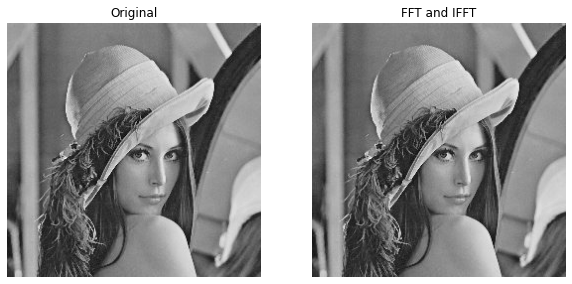

In [ ]:
def ifft(x):
    if len(x)<=1: 
      return x

    evens=x[0::2]
    odds=x[1::2]
    even=ifft(evens)
    odd=ifft(odds)

    T=[np.exp(2j*np.pi*i/len(x))*odd[i] for i in range(len(odd))]

    out=[]
    out1=even+T
    out=np.append(out,out1)
    out2=even-T
    out=np.append(out,out2)
    return out

def ifft2d(img):
    temp=np.apply_along_axis(ifft,1,img)
    out = np.apply_along_axis(ifft,0,temp)
    out=out/(out.size)
    return out

flowers=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/8-bit-256-x-256-Grayscale-Lena-Image_Q320.jpg",0)

fftflow= fft2d(flowers)
output1 = ifft2d(fftflow)
# cv2_imshow(output1)
fig, sub = plt.subplots(1, 2,figsize=(10,10))
sub[0].imshow(flowers,cmap='gray')
sub[0].axis('off')
sub[0].set_title('Original')

sub[1].imshow(np.real(output1),cmap='gray')
sub[1].axis('off')
sub[1].set_title('FFT and IFFT')

#Q6

Text(0.5, 1.0, 'Built-in convolution')

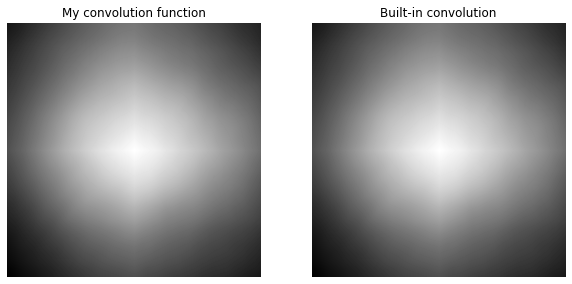

In [ ]:
def convolution(img1,img2):
  img1=img1.astype(np.int64)
  img2=img2.astype(np.int64)
  img1=np.flip(img1)

  r1,c1=img1.shape

  if r1%2==0:
    imgpad=np.zeros([r1+1,c1+1])
    imgpad[0:r1,0:c1]=img1
    img1=imgpad

  r1,c1 = img1.shape
  r2,c2 = img2.shape

  out=np.zeros(img2.shape)

  imgpad=np.zeros([r1+r2-1,c1+c2-1])
  #print(img2.shape, imgpad[r2//2:r1+r2//2-1,c2//2:c1+c2//2-1].shape)
  imgpad[r2//2:r1+r2//2-1 , c2//2:c1+c2//2-1]=img2
  img2=imgpad

  r2,c2 = img2.shape

  for i in range(0, r2 - r1 + 1):
      for j in range(0, c2 - c1 + 1):
            temp = img2[i:i + r1,j:j + c1]
            kernel=temp*img1
            out[i][j]= np.sum(kernel, dtype = np.float64)
  return out[0:r2,0:c2].astype(np.int64)

lena_256=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/8-bit-256-x-256-Grayscale-Lena-Image_Q320.jpg")
flower=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/Juliasetsdkjpeglumchr0.jpg")
lena_256 = cv2.cvtColor(lena_256, cv2.COLOR_BGR2GRAY)
flower = cv2.cvtColor(flower, cv2.COLOR_BGR2GRAY)

out1 = signal.convolve2d(lena_256.astype(np.int64), flower.astype(np.int64), boundary='fill', mode='same')

fig, sub=plt.subplots(1,2,figsize=(10,10))
sub[0].imshow(convolution(lena_256,flower),cmap='gray')
sub[0].axis('off')
sub[0].set_title("My convolution function")

sub[1].imshow(out1, cmap='gray')
sub[1].axis('off')
sub[1].set_title("Built-in convolution")

####1
Compute IFT(F.H) and f * h. Check whether IFT(F.H) corresponds to the center
portion of f * h. Compute the average of squared difference between pixel values
in IFT(F.H) and the central 256 × 256 portion of f * h (F.H denotes point-wise
multiplication of F and H and f * h denotes convolution with padding).

(256, 256)
(256, 256)
the mse is 1.4421466349180067e+17


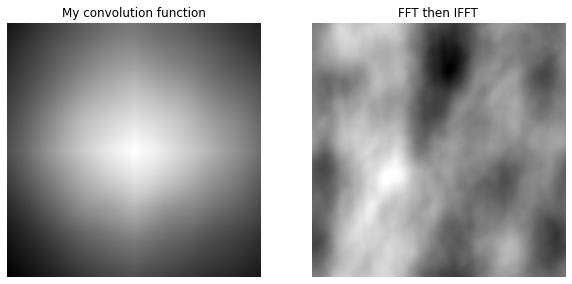

In [ ]:
lena_256=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/8-bit-256-x-256-Grayscale-Lena-Image_Q320.jpg")
flower=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/Juliasetsdkjpeglumchr0.jpg")
lena_256 = cv2.cvtColor(lena_256, cv2.COLOR_BGR2GRAY)
flower = cv2.cvtColor(flower, cv2.COLOR_BGR2GRAY)

fig, sub=plt.subplots(1,2,figsize=(10,10))
qwer=convolution(lena_256,flower)
print(qwer.shape)
sub[0].imshow(qwer,cmap='gray')
sub[0].axis('off')
sub[0].set_title("My convolution function")

asdf=fft2d(lena_256)*fft2d(flower)
asdf=ifft2d(asdf)
print(asdf.shape)
sub[1].imshow(np.real(asdf), cmap='gray')
sub[1].axis('off')
sub[1].set_title("FFT then IFFT")

mse=((np.subtract(np.real(asdf),np.real(qwer)))**2).mean()
print("the mse is", mse)

####2
What changes do you observe when you zero pad the original images to dimension
(511 × 511) and now calculate IFT(F.H) and report the new error. 

the mse is 8.308980597081576e+16


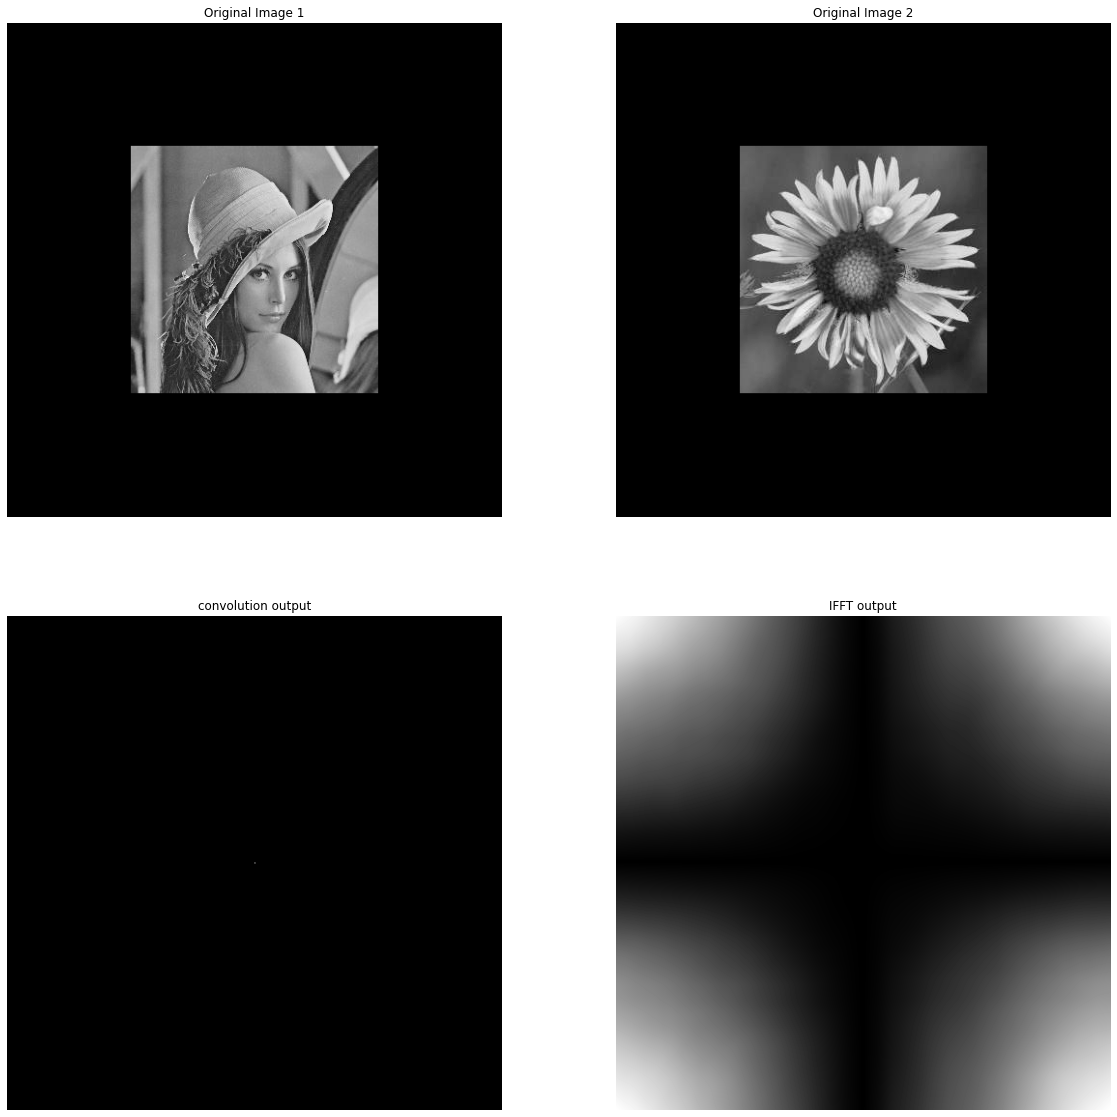

In [ ]:
lena_256=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/8-bit-256-x-256-Grayscale-Lena-Image_Q320.jpg")
flower=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/Juliasetsdkjpeglumchr0.jpg")
lena_256 = cv2.cvtColor(lena_256, cv2.COLOR_BGR2GRAY)
flower = cv2.cvtColor(flower, cv2.COLOR_BGR2GRAY)

lena_256=cv2.copyMakeBorder(lena_256, 128, 128, 128, 128, cv2.BORDER_CONSTANT)
flower=cv2.copyMakeBorder(flower, 128, 128, 128, 128, cv2.BORDER_CONSTANT)

qwer=convolution(lena_256,flower)
asdf=fft2d(lena_256)*fft2d(flower)
asdf=np.real(ifft2d(asdf))

fig, sub=plt.subplots(2,2,figsize=(20,20))
sub[0][0].imshow(lena_256,cmap='gray')
sub[0][0].axis('off')
sub[0][0].set_title("Original Image 1")

sub[0][1].imshow(flower, cmap='gray')
sub[0][1].axis('off')
sub[0][1].set_title("Original Image 2")

sub[1][0].imshow(qwer,cmap='gray')
sub[1][0].axis('off')
sub[1][0].set_title("convolution output")

sub[1][1].imshow(asdf, cmap='gray')
sub[1][1].axis('off')
sub[1][1].set_title("IFFT output")

mse=((np.subtract(np.real(asdf),np.real(qwer)))**2).mean()
print("the mse is", mse)

Choose any
64x64 image. Now, add 64 columns and rows of zeros to the right and bottom side
of the original image. Repeat this process two more times each time doubling the
image size and padding the pixels on the right and bottom by zeroes. You will
therefore have 4 images first one 64 × 64 with no zero padding and then 128 × 128,
256 × 256 and 512 × 512 after padding. Find the Fourier transform of all these
images. Display the results and explain and justify the relationship between the
four outputs you get.

Text(0.5, 1.0, '512x512')

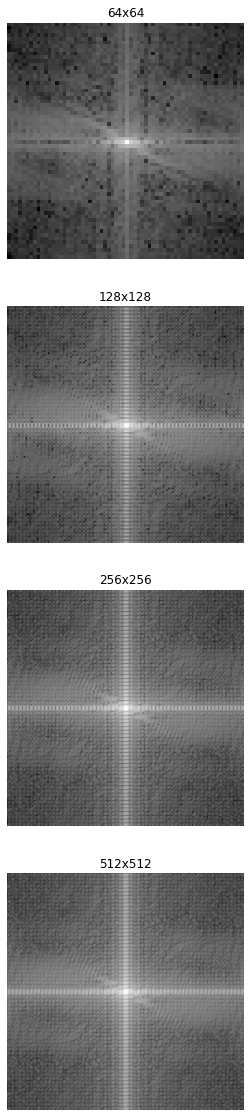

In [ ]:
lena_256=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/8-bit-256-x-256-Grayscale-Lena-Image_Q320.jpg")
lena_256 = cv2.cvtColor(lena_256, cv2.COLOR_BGR2GRAY)

lena64=lena_256[0:64,0:64]

lena128=cv2.copyMakeBorder(lena64, 0, 64, 0, 64, cv2.BORDER_CONSTANT)
lena256=cv2.copyMakeBorder(lena128, 0, 128, 0, 128, cv2.BORDER_CONSTANT)
lena512=cv2.copyMakeBorder(lena256, 0, 256, 0, 256, cv2.BORDER_CONSTANT)
"""
print(lena64.shape)
print(lena128.shape)
print(lena256.shape)
print(lena512.shape)

cv2_imshow(lena64)
cv2_imshow(lena128)
cv2_imshow(lena256)
cv2_imshow(lena512)
"""
f64=fft2d(lena64)
f128=fft2d(lena128)
f256=fft2d(lena256)
f512=fft2d(lena512)

f64=np.log(1 + np.abs(np.fft.fftshift(f64)))
f128=np.log(1 + np.abs(np.fft.fftshift(f128)))
f256=np.log(1 + np.abs(np.fft.fftshift(f256)))
f512=np.log(1 + np.abs(np.fft.fftshift(f512)))

fig, sub=plt.subplots(4,1,figsize=(20,20))
sub[0].imshow(f64,cmap='gray')
sub[0].axis('off')
sub[0].set_title("64x64")

sub[1].imshow(f128, cmap='gray')
sub[1].axis('off')
sub[1].set_title("128x128")

sub[2].imshow(f256,cmap='gray')
sub[2].axis('off')
sub[2].set_title("256x256")

sub[3].imshow(f512, cmap='gray')
sub[3].axis('off')
sub[3].set_title("512x512")

#Q7
Denoise the given image noisy-lena.png and explain your process

In [ ]:
noisy=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/noisy_lena.png",0)
orig=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/image (5).jpg",0)

fnoisy = np.fft.fftshift(fft2d(noisy))
forig = np.fft.fftshift(fft2d(orig))

avg=fnoisy.mean()

fnoisy[:,90:95]=avg
fnoisy[:,415:420]=avg
fnoisy[0:230,255:260]=avg
fnoisy[280:510,255:260]=avg
fnoisy[230:280,30:140]=avg
fnoisy[230:280,370:480]=avg
fnoisy[250:260,0:240]=avg
fnoisy[250:260,270:510]=avg

out=np.real(ifft2d(np.fft.ifftshift(fnoisy)))

Text(0.5, 1.0, 'FFT of output')

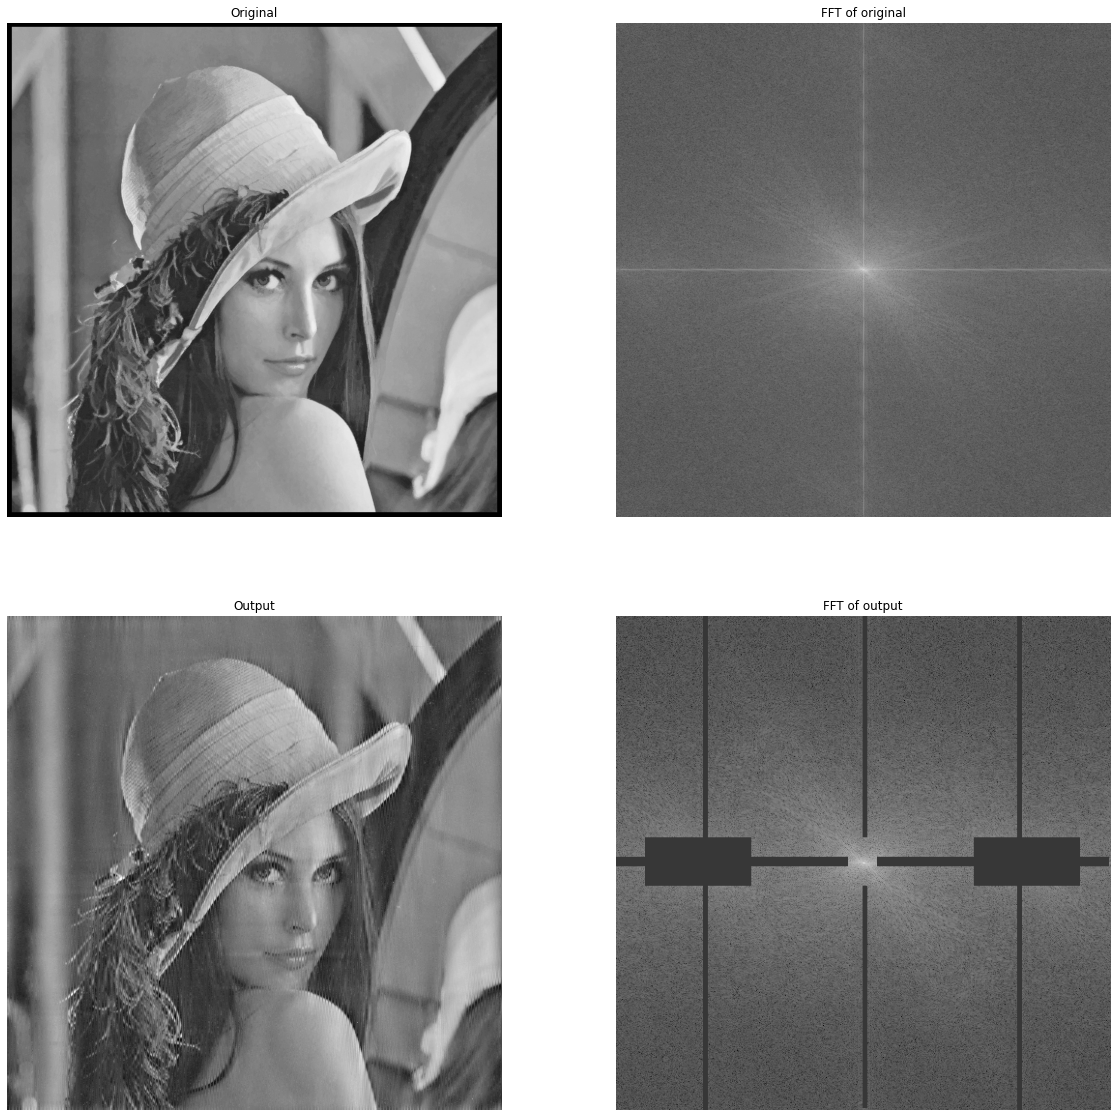

In [179]:
fig, sub= plt.subplots(2, 2,figsize=(20,20))
sub[0][0].imshow(orig,'gray')
sub[0][0].axis('off')
sub[0][0].set_title("Original")

sub[0][1].imshow(np.log(1+np.abs(forig)),'gray')
sub[0][1].axis('off')
sub[0][1].set_title("FFT of original")

sub[1][0].imshow(out,'gray')
sub[1][0].axis('off')
sub[1][0].set_title("Output")

sub[1][1].imshow(np.log(1+np.abs(fnoisy)),'gray')
sub[1][1].axis('off')
sub[1][1].set_title("FFT of output")

In [ ]:
#random shit
bell=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip2/bell.jpg",0)
bell.size

175616